In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "C:/Users/Jose Guevara/Desktop/Kaggle/2024 Boston Marathon Weather and Splits\Datasets/Merged_Athletes_and_Weather_Data.csv"
data = pd.read_csv(file_path)

# Encode Gender: M = 1, F = 0
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})

In [3]:
# One-hot encode 'Age Group'
encoder = OneHotEncoder(sparse_output=False, drop='first')
age_group_encoded = encoder.fit_transform(data[['Age Group']])
age_group_encoded_df = pd.DataFrame(age_group_encoded, index=data.index, columns=encoder.get_feature_names_out(['Age Group']))

# Merge the encoded columns back to the original data
data = pd.concat([data, age_group_encoded_df], axis=1)
data.drop(columns=['Age Group'], inplace=True)

# Set 'Bib' and 'Zip' as indexes
data.set_index(['Zip', 'Bib'], inplace=True)

# Drop rows with missing values
data_cleaned = data.dropna()

# Separate numerical and categorical features
numerical_features = data_cleaned.drop(columns=['Gender'] + list(encoder.get_feature_names_out(['Age Group']))).columns
categorical_features = list(encoder.get_feature_names_out(['Age Group']))

# Apply MinMaxScaler only to numerical features
scaler = MinMaxScaler()
data_cleaned.loc[:, numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

In [4]:
# Split the data into features and target
X_cleaned = data_cleaned.drop(columns=['Gender'])
y_cleaned = data_cleaned['Gender']

# Split the cleaned and scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)


In [6]:
# Logistic Regression Model
logistic_regression_cv = LogisticRegressionCV(cv=5, penalty='l2', solver='lbfgs', max_iter=10000)
logistic_regression_cv.fit(X_train, y_train)
y_pred_logistic = logistic_regression_cv.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)


In [7]:
# CART Model
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)
y_pred_cart = cart_model.predict(X_test)
accuracy_cart = accuracy_score(y_test, y_pred_cart)
classification_report_cart = classification_report(y_test, y_pred_cart)

In [8]:
# Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

In [9]:
# Feature Importance from Random Forest
feature_importance = random_forest_model.feature_importances_
features = X_cleaned.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

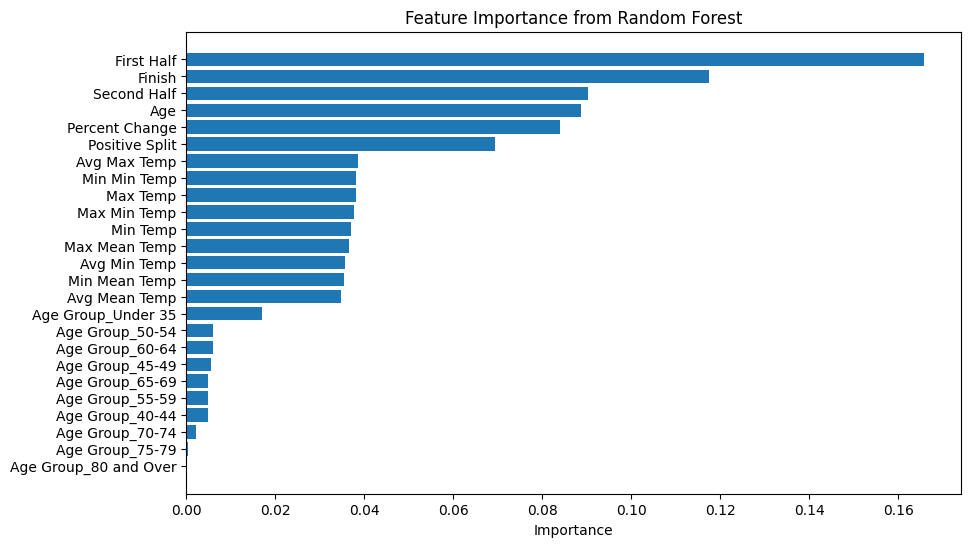

Logistic Regression Model

Accuracy: 0.7039837161965687
              precision    recall  f1-score   support

           0       0.70      0.78      0.73      1818
           1       0.71      0.62      0.67      1621

    accuracy                           0.70      3439
   macro avg       0.71      0.70      0.70      3439
weighted avg       0.70      0.70      0.70      3439


CART Model

Accuracy: 0.7025298051759232
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1818
           1       0.68      0.69      0.68      1621

    accuracy                           0.70      3439
   macro avg       0.70      0.70      0.70      3439
weighted avg       0.70      0.70      0.70      3439


Random Forest Model

Accuracy: 0.7743530095958128
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1818
           1       0.74      0.80      0.77      1621

    accuracy                     

In [10]:
# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Print Results
print("Logistic Regression Model\n")
print("Accuracy:", accuracy_logistic)
print(classification_report_logistic)

print("\nCART Model\n")
print("Accuracy:", accuracy_cart)
print(classification_report_cart)

print("\nRandom Forest Model\n")
print("Accuracy:", accuracy_rf)
print(classification_report_rf)

print("\nFeature Importance from Random Forest\n")
print(importance_df)